In [1]:
import os
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

In [7]:
def mol2fp(mol, radi=2, nBits=1024):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radi, nBits=nBits)
    arr = np.zeros((0,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [29]:
smi_file = "../data/derived/train_desalt.smi"

In [30]:
smiles = []
ind_names = []
smiles_dict = {}
with open(smi_file, 'r') as iFile:
    for i, s in enumerate(iFile):
        S = s.strip().split()
        smiles.append([S[0], i])
        ind_names.append(S[1])
        smiles_dict[S[1]] = S[0]

In [31]:
print(len(smiles_dict), len(smiles))

70711 70711


In [32]:
all_mols = []
for i in list(smiles_dict):
    m = Chem.MolFromSmiles(smiles_dict[i])
    m.SetProp("_Name",i)
    all_mols.append(m)

In [33]:
all_fp = []
for m in all_mols:
    a = mol2fp(m)
    all_fp.append(a)
all_fp = np.array(all_fp)

In [34]:
fp_df = pd.DataFrame(all_fp)
fp_df['Id'] = list(smiles_dict)

In [18]:
# fp_df

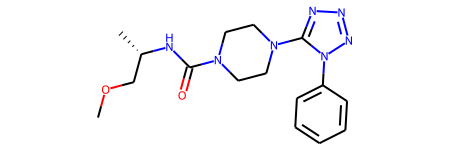

In [35]:
# m = Chem.MolFromSmiles('C1OCCC1c1c(Br)nc(O)cc1CC(=O)OCc1cnoc1')
m

In [36]:
fp_df.shape

(70711, 1025)

In [37]:
fp_df.to_csv('train_fp.csv', index=False)